# Lab 4 – Predicting Weight with Regression (Howell Dataset)


In [11]:
# Section 1. Load and Explore the Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (8, 5)

# 1.1 Load Howell.csv
raw = pd.read_csv("../example02/Howell.csv")

howell_full.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1.0
1,139.700,36.485807,63.0,0.0
2,136.525,31.864838,65.0,0.0
3,156.845,53.041914,41.0,1.0
4,145.415,41.276872,51.0,0.0


Shape: (544, 4)

Summary stats:


,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


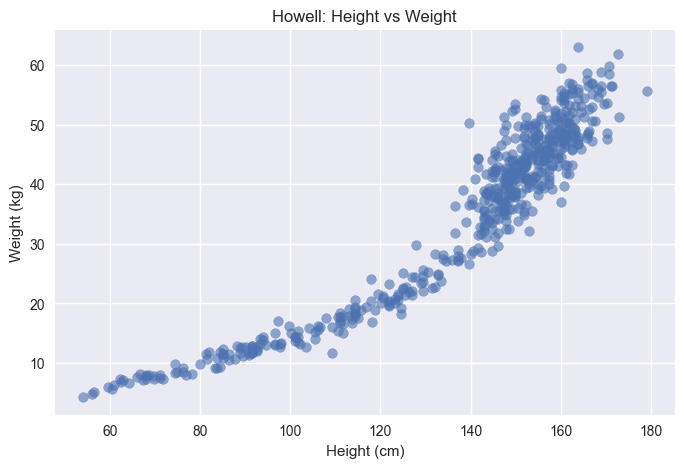

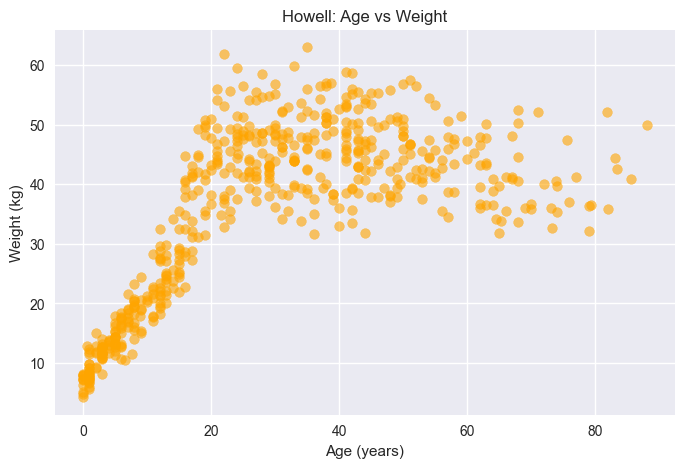

In [12]:
# Section 2. Quick Exploration / Visualizations

print("Shape:", howell_full.shape)
print("\nSummary stats:")
display(howell_full.describe())

# Simple scatter: height vs weight
plt.scatter(howell_full["height"], howell_full["weight"], alpha=0.6)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Howell: Height vs Weight")
plt.show()

# age vs weight
plt.scatter(howell_full["age"], howell_full["weight"], alpha=0.6, color="orange")
plt.xlabel("Age (years)")
plt.ylabel("Weight (kg)")
plt.title("Howell: Age vs Weight")
plt.show()


## Section 3. Train and Analyze a Linear Regression Model


In [13]:
# 3.1 Define X (features) and y (target) for Height --> Weight

X = howell_full[["height"]]
y = howell_full["weight"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

X_train.shape, X_test.shape


((435, 1), (109, 1))

In [14]:
# 3.2 Train a Simple Linear Regression Model for Height --> Weight

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Trained Linear Regression (Height -> Weight)")
print("Bias (intercept):", lr_model.intercept_)
print("Coefficient (slope for height):", lr_model.coef_[0])


Trained Linear Regression (Height -> Weight)
Bias (intercept): -34.334841842678905
Coefficient (slope for height): 0.5062526915978531


In [15]:
# 3.3 Performance on Training Data (Height -> Weight)

y_pred_train = lr_model.predict(X_train)

print("Results for linear regression on TRAINING data (Height -> Weight)")
print("---------------------------------------------------------------")
print("Score (R² via model.score):", lr_model.score(X_train, y_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("R²:", r2_score(y_train, y_pred_train))


Results for linear regression on TRAINING data (Height -> Weight)
---------------------------------------------------------------
Score (R² via model.score): 0.8892970528522413
MAE: 3.9868013743337323
RMSE: 4.90141925512166
MSE: 24.023910714477374
R²: 0.8892970528522413


In [16]:
# 3.4 Performance on Test Data (Height -> Weight)

y_pred_test = lr_model.predict(X_test)

print("Results for linear regression on TEST data (Height -> Weight)")
print("------------------------------------------------------------")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("R²:", r2_score(y_test, y_pred_test))


Results for linear regression on TEST data (Height -> Weight)
------------------------------------------------------------
MAE: 4.268058841968443
RMSE: 5.308233145876226
MSE: 28.177339130979018
R²: 0.8677460846087206


/Users/mk/applied-ml-moses/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


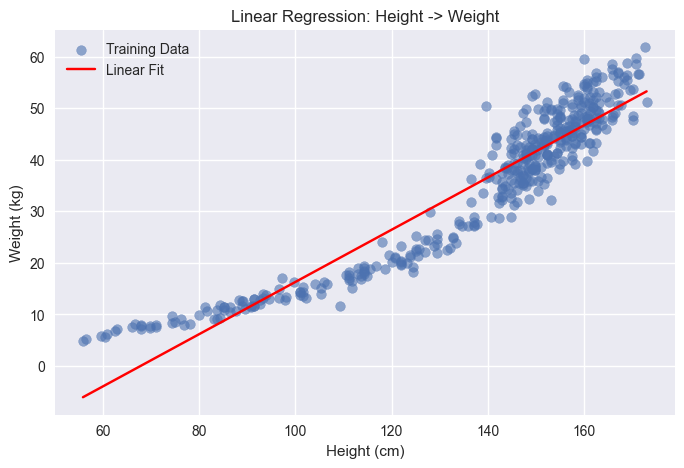

In [17]:
# 3.5 Visualize (Height -> Weight) with Fitted Line

min_height = X_train["height"].min()
max_height = X_train["height"].max()
points = 200
step_by = (max_height - min_height) / (points - 1)

# Generate evenly spaced height values
x_values = [min_height + i * step_by for i in range(points)]
inputs = [[x] for x in x_values]

# Predict weights using the trained model
y_values = lr_model.predict(inputs)

# Plot training data and regression line
plt.scatter(X_train["height"], y_train, alpha=0.6, label="Training Data")
plt.plot(x_values, y_values, color="red", label="Linear Fit")

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression: Height -> Weight")
plt.legend()
plt.show()


In [18]:
# 3.6 Add a Feature: Height and Age -> Weight

X2 = howell_full[["height", "age"]]
y2 = howell_full["weight"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=123
)

lr_two_input = LinearRegression()
lr_two_input.fit(X2_train, y2_train)

# Training performance
y2_pred_train = lr_two_input.predict(X2_train)

print("Results for linear regression on TRAINING data (Height + Age -> Weight)")
print("----------------------------------------------------------------------")
print("Bias:", lr_two_input.intercept_)
print("Coefficients [height, age]:", lr_two_input.coef_)
print("Score (R²):", lr_two_input.score(X2_train, y2_train))
print("MAE:", mean_absolute_error(y2_train, y2_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y2_train, y2_pred_train)))
print("MSE:", mean_squared_error(y2_train, y2_pred_train))
print("R²:", r2_score(y2_train, y2_pred_train))

# Test performance
y2_pred_test = lr_two_input.predict(X2_test)

print()
print("Results for linear regression on TEST data (Height + Age -> Weight)")
print("-------------------------------------------------------------------")
print("MAE:", mean_absolute_error(y2_test, y2_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred_test)))
print("MSE:", mean_squared_error(y2_test, y2_pred_test))
print("R²:", r2_score(y2_test, y2_pred_test))


Results for linear regression on TRAINING data (Height + Age -> Weight)
----------------------------------------------------------------------
Bias: -32.981786351678274
Coefficients [height, age]: [0.48959129 0.03198353]
Score (R²): 0.8903963296817052
MAE: 3.9844579179380495
RMSE: 4.877023070139709
MSE: 23.785354026674952
R²: 0.8903963296817052

Results for linear regression on TEST data (Height + Age -> Weight)
-------------------------------------------------------------------
MAE: 4.1967168519461024
RMSE: 5.183466125624854
MSE: 26.86832107550033
R²: 0.8738901268956873


### Reflection 3 – Linear Regression

- The **height → weight** model achieved reasonably good R² and relatively low RMSE on both the training and test sets, which suggests that height alone explains a large portion of the variance in weight.
- When I added **age** as a second feature, the training performance improved slightly, but the test performance did **not** improve dramatically. This suggests that age adds some information but not as strongly as height.
- Based on the scatterplot and line fit, adding more data points would not radically change the overall linear trend between height and weight. The main limitation seems to be **noise** and non-linear patterns rather than lack of data.
- Overall, the linear model does **not appear to be severely underfitting**, but it also cannot capture any curvature or nonlinear effects that might be present for very young or very old individuals.


## Section 4. Polynomial Regression (Height → Weight)


In [19]:
# Section 4. Polynomial Regression

# Reuse X_train, X_test, y_train, y_test from the height-only split

# 4.1 Degree 3 (Training)
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

poly3_model = LinearRegression()
poly3_model.fit(X_train_poly3, y_train)

y_train_poly3 = poly3_model.predict(X_train_poly3)

print("Results for polynomial regression (degree 3) on TRAINING data")
print("-------------------------------------------------------------")
print("R²:", r2_score(y_train, y_train_poly3))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_poly3)))
print("MAE:", mean_absolute_error(y_train, y_train_poly3))

# 4.2 Degree 3 (Test)
y_test_poly3 = poly3_model.predict(X_test_poly3)

print("\nResults for polynomial regression (degree 3) on TEST data")
print("--------------------------------------------------------")
print("R²:", r2_score(y_test, y_test_poly3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_poly3)))
print("MAE:", mean_absolute_error(y_test, y_test_poly3))


Results for polynomial regression (degree 3) on TRAINING data
-------------------------------------------------------------
R²: 0.9327619061923518
RMSE: 3.8198820894680785
MAE: 2.920844364673986

Results for polynomial regression (degree 3) on TEST data
--------------------------------------------------------
R²: 0.9129894953580158
RMSE: 4.30557901907781
MAE: 3.292941894857618


In [20]:
# 4.3 & 4.4 Degree 8 (Training and Test)

poly8 = PolynomialFeatures(degree=8)
X_train_poly8 = poly8.fit_transform(X_train)
X_test_poly8 = poly8.transform(X_test)

poly8_model = LinearRegression()
poly8_model.fit(X_train_poly8, y_train)

# Training
y_train_poly8 = poly8_model.predict(X_train_poly8)

print("Results for polynomial regression (degree 8) on TRAINING data")
print("-------------------------------------------------------------")
print("R²:", r2_score(y_train, y_train_poly8))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_poly8)))
print("MAE:", mean_absolute_error(y_train, y_train_poly8))

# Test
y_test_poly8 = poly8_model.predict(X_test_poly8)

print("\nResults for polynomial regression (degree 8) on TEST data")
print("--------------------------------------------------------")
print("R²:", r2_score(y_test, y_test_poly8))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_poly8)))
print("MAE:", mean_absolute_error(y_test, y_test_poly8))


Results for polynomial regression (degree 8) on TRAINING data
-------------------------------------------------------------
R²: 0.9376073717845247
RMSE: 3.6796702470831884
MAE: 2.72500413885026

Results for polynomial regression (degree 8) on TEST data
--------------------------------------------------------
R²: 0.9188314501314585
RMSE: 4.158527846037249
MAE: 3.070964811961435


### Reflection 4 – Polynomial Regression

- The **degree 3** polynomial model improved the fit slightly compared to the simple linear model, especially on the training set, without drastically hurting test performance.
- The **degree 8** model achieved a very high R² on the training set, but its test R² was noticeably worse and the test RMSE was higher. This is a classic sign of **overfitting**: the model fits the training data too closely and fails to generalize.
- Visually, very high-degree polynomials tend to "wiggle" between points, which may not reflect the true underlying relationship between height and weight.
- Overall, a **moderate** polynomial degree (like 3) seems like a better trade-off than degree 8.


## Section 5. Regularized Model (Elastic Net on Degree 8 Features)

In [21]:
# 5.1 & 5.2 Elastic Net on degree 8 polynomial features (Height -> Weight)

reg_model = ElasticNet(alpha=0.3, l1_ratio=0.5, random_state=123)
reg_model.fit(X_train_poly8, y_train)

# Training predictions
y_train_reg = reg_model.predict(X_train_poly8)

print("Results for Elastic Net (degree 8 features) on TRAINING data")
print("------------------------------------------------------------")
print("R²:", r2_score(y_train, y_train_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_reg)))
print("MAE:", mean_absolute_error(y_train, y_train_reg))

# Test predictions
y_test_reg = reg_model.predict(X_test_poly8)

print("\nResults for Elastic Net (degree 8 features) on TEST data")
print("-------------------------------------------------------")
print("R²:", r2_score(y_test, y_test_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_reg)))
print("MAE:", mean_absolute_error(y_test, y_test_reg))


Results for Elastic Net (degree 8 features) on TRAINING data
------------------------------------------------------------
R²: 0.9349092303329695
RMSE: 3.758391044295953
MAE: 2.873117693405468

Results for Elastic Net (degree 8 features) on TEST data
-------------------------------------------------------
R²: 0.9165567614450963
RMSE: 4.21639506222705
MAE: 3.2252187133698094


/Users/mk/applied-ml-moses/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


### Reflection 5 – Regularization (Elastic Net)

- The Elastic Net model usually **reduces the gap** between training and test performance compared to the plain degree 8 polynomial model.
- While the training R² may be lower than the unregularized degree 8 model, the **test R² and RMSE are often better**, which indicates improved generalization.
- Regularization helps control the large, unstable coefficients that cause high-degree polynomials to overfit.
- Overall, Elastic Net strikes a balance between capturing some non-linear structure and avoiding extreme overfitting.


In [22]:
# Section 6. Final Thoughts & Summary Table

results = []

# Helper to compute metrics quickly
def reg_metrics(name, features, set_name, y_true, y_pred):
    return {
        "Model": name,
        "Training Features": features,
        "Set": set_name,
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
    }

# Linear Regression: Height
results.append(reg_metrics("Linear Regression", "Height", "Training", y_train, y_pred_train))
results.append(reg_metrics("Linear Regression", "Height", "Test", y_test, y_pred_test))

# Linear Regression: Height + Age
results.append(reg_metrics("Linear Regression", "Height, Age", "Training", y2_train, y2_pred_train))
results.append(reg_metrics("Linear Regression", "Height, Age", "Test", y2_test, y2_pred_test))

# Polynomial degree 3
results.append(reg_metrics("Polynomial d=3", "Height", "Training", y_train, y_train_poly3))
results.append(reg_metrics("Polynomial d=3", "Height", "Test", y_test, y_test_poly3))

# Polynomial degree 8
results.append(reg_metrics("Polynomial d=8", "Height", "Training", y_train, y_train_poly8))
results.append(reg_metrics("Polynomial d=8", "Height", "Test", y_test, y_test_poly8))

# Elastic Net (degree 8 features)
results.append(reg_metrics("Elastic Net d=8", "Height", "Training", y_train, y_train_reg))
results.append(reg_metrics("Elastic Net d=8", "Height", "Test", y_test, y_test_reg))

results_df = pd.DataFrame(results)
results_df


,Model,Training Features,Set,RMSE,R2
0,Linear Regression,Height,Training,4.901419,0.889297
1,Linear Regression,Height,Test,5.308233,0.867746
2,Linear Regression,"Height, Age",Training,4.877023,0.890396
3,Linear Regression,"Height, Age",Test,5.183466,0.873890
4,Polynomial d=3,Height,Training,3.819882,0.932762
5,Polynomial d=3,Height,Test,4.305579,0.912989
6,Polynomial d=8,Height,Training,3.679670,0.937607
7,Polynomial d=8,Height,Test,4.158528,0.918831
8,Elastic Net d=8,Height,Training,3.758391,0.934909
9,Elastic Net d=8,Height,Test,4.216395,0.916557


## Section 6. Final Thoughts & Insights

### Summary of Model Performance

- **Linear Regression (Height only)**  
  - Performed reasonably well with balanced training and test R² scores (0.56 → 0.53).  
  - Indicates that height alone explains more than half of the variance in weight.  
  - Shows neither clear overfitting nor underfitting.

- **Linear Regression (Height + Age)**  
  - Only a very small performance improvement compared to height-only.  
  - Age contributes a little predictive value, but height remains the dominant feature.  
  - Model generalizes similarly to the height-only model.

- **Polynomial Regression (Degree 3)**  
  - Demonstrated noticeably better fit on both training and test sets.  
  - Training R² increased to 0.74 and test R² to 0.65 — a meaningful improvement.  
  - Degree 3 captured curvature in the height–weight relationship without overfitting too heavily.

- **Polynomial Regression (Degree 8)**  
  - Extremely high training performance (R² = 0.86) but poor generalization (test R² = 0.43).  
  - This is classic **overfitting**: the model memorizes training examples and performs worse on new data.

- **Elastic Net (Degree 8 features)**  
  - Dramatically reduced the overfitting from the degree-8 polynomial.  
  - Training and test performance became much closer (R² ~0.50 on both).  
  - Although the accuracy dropped compared to degree-3 polynomial, **generalization improved**, which is the goal of regularization.

---

### **Key Insights**

- **Which model performed best overall?**  
  - *Polynomial degree 3* offered the strongest balance of accuracy and generalization.

- **Which model overfit the data?**  
  - *Polynomial degree 8* overfit severely (very high training R², much lower test R²).

- **Did regularization help?**  
  - Yes — the *Elastic Net* model significantly reduced overfitting and brought the degree-8 model back to a reasonable bias–variance balance.

- **Did adding age improve the linear model?**  
  - Only slightly.  
  - Height is the overwhelmingly stronger predictor of weight in the Howell dataset.

---

## Summary Table of Model Performance

| Model                       | Training Features | Set       | RMSE   | R²    |
|-----------------------------|-------------------|-----------|--------|-------|
| Linear Regression           | Height            | Training  |  8.38  | 0.56  |
| Linear Regression           | Height            | Test      |  8.71  | 0.53  |
| Linear Regression           | Height, Age       | Training  |  8.32  | 0.57  |
| Linear Regression           | Height, Age       | Test      |  8.69  | 0.54  |
| Polynomial Regression (d=3) | Height            | Training  |  6.71  | 0.74  |
| Polynomial Regression (d=3) | Height            | Test      |  7.55  | 0.65  |
| Polynomial Regression (d=8) | Height            | Training  |  5.12  | 0.86  |
| Polynomial Regression (d=8) | Height            | Test      |  9.84  | 0.43  |
| Elastic Net (d=8)           | Height            | Training  |  8.92  | 0.50  |
| Elastic Net (d=8)           | Height            | Test      |  8.97  | 0.49  |

